<a href="https://colab.research.google.com/github/eparamasari/temp-repo/blob/main/ghg_emissions_by_country_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("ghg_emissions_by_country_2018.csv")
df.head()

,Time,Time Code,Country Name,Country Code,Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE],Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.AG.KT.CE],CO2 emissions (kg per 2010 US$ of GDP) [EN.ATM.CO2E.KD.GD],CO2 emissions (kg per 2017 PPP $ of GDP) [EN.ATM.CO2E.PP.GD.KD],CO2 emissions (kg per PPP $ of GDP) [EN.ATM.CO2E.PP.GD],CO2 emissions (kt) [EN.ATM.CO2E.KT],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],Methane emissions (kt of CO2 equivalent) [EN.ATM.METH.KT.CE],Methane emissions in energy sector (thousand metric tons of CO2 equivalent) [EN.ATM.METH.EG.KT.CE],Nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.KT.CE],Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.EG.KT.CE],Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE]
0,2018,YR2018,Afghanistan,AFG,10450,4300,0.354489959,0.098412154,0.096104698,7440,0.200151071,81510,67910,8960,4280,98920
1,2018,YR2018,Albania,ALB,2010,960,0.382223869,0.145584469,0.143190801,5560,1.939731563,3160,220,1100,90,10080
2,2018,YR2018,Algeria,DZA,6810,5520,0.75533596,0.30850337,0.301269935,151670,3.591657418,49550,28920,12110,3300,218910
3,2018,YR2018,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..,..,..
4,2018,YR2018,Andorra,AND,0,0,0.132352515,..,..,460,5.97340536,50,0,0,0,590


In [3]:
df.drop(['Time', 'Time Code', 'Country Code'], axis=1, inplace=True)
df.set_index('Country Name', inplace=True)
df.replace(to_replace='..', value=np.NaN, inplace=True)
df = df.apply(pd.to_numeric)
df.head()

,Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE],Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.AG.KT.CE],CO2 emissions (kg per 2010 US$ of GDP) [EN.ATM.CO2E.KD.GD],CO2 emissions (kg per 2017 PPP $ of GDP) [EN.ATM.CO2E.PP.GD.KD],CO2 emissions (kg per PPP $ of GDP) [EN.ATM.CO2E.PP.GD],CO2 emissions (kt) [EN.ATM.CO2E.KT],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],Methane emissions (kt of CO2 equivalent) [EN.ATM.METH.KT.CE],Methane emissions in energy sector (thousand metric tons of CO2 equivalent) [EN.ATM.METH.EG.KT.CE],Nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.KT.CE],Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.EG.KT.CE],Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE]
Country Name,,,,,,,,,,,,
Afghanistan,10450.0,4300.0,0.354490,0.098412,0.096105,7440.0,0.200151,81510.0,67910.0,8960.0,4280.0,98920.0
Albania,2010.0,960.0,0.382224,0.145584,0.143191,5560.0,1.939732,3160.0,220.0,1100.0,90.0,10080.0
Algeria,6810.0,5520.0,0.755336,0.308503,0.301270,151670.0,3.591657,49550.0,28920.0,12110.0,3300.0,218910.0
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,0.0,0.0,0.132353,NaN,NaN,460.0,5.973405,50.0,0.0,0.0,0.0,590.0


In [4]:
df.dropna(how='all', inplace=True)
df.head()

,Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE],Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.AG.KT.CE],CO2 emissions (kg per 2010 US$ of GDP) [EN.ATM.CO2E.KD.GD],CO2 emissions (kg per 2017 PPP $ of GDP) [EN.ATM.CO2E.PP.GD.KD],CO2 emissions (kg per PPP $ of GDP) [EN.ATM.CO2E.PP.GD],CO2 emissions (kt) [EN.ATM.CO2E.KT],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],Methane emissions (kt of CO2 equivalent) [EN.ATM.METH.KT.CE],Methane emissions in energy sector (thousand metric tons of CO2 equivalent) [EN.ATM.METH.EG.KT.CE],Nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.KT.CE],Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.EG.KT.CE],Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE]
Country Name,,,,,,,,,,,,
Afghanistan,10450.0,4300.0,0.354490,0.098412,0.096105,7440.0,0.200151,81510.0,67910.0,8960.0,4280.0,98920.0
Albania,2010.0,960.0,0.382224,0.145584,0.143191,5560.0,1.939732,3160.0,220.0,1100.0,90.0,10080.0
Algeria,6810.0,5520.0,0.755336,0.308503,0.301270,151670.0,3.591657,49550.0,28920.0,12110.0,3300.0,218910.0
Andorra,0.0,0.0,0.132353,NaN,NaN,460.0,5.973405,50.0,0.0,0.0,0.0,590.0
Angola,16660.0,15910.0,0.274399,0.127984,0.124984,27340.0,0.887380,35520.0,17460.0,16440.0,180.0,79730.0


In [5]:
df.describe()

,Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE],Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.AG.KT.CE],CO2 emissions (kg per 2010 US$ of GDP) [EN.ATM.CO2E.KD.GD],CO2 emissions (kg per 2017 PPP $ of GDP) [EN.ATM.CO2E.PP.GD.KD],CO2 emissions (kg per PPP $ of GDP) [EN.ATM.CO2E.PP.GD],CO2 emissions (kt) [EN.ATM.CO2E.KT],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],Methane emissions (kt of CO2 equivalent) [EN.ATM.METH.KT.CE],Methane emissions in energy sector (thousand metric tons of CO2 equivalent) [EN.ATM.METH.EG.KT.CE],Nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.KT.CE],Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.EG.KT.CE],Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE]
count,2.390000e+02,2.390000e+02,231.000000,228.000000,230.000000,2.390000e+02,239.000000,2.390000e+02,2.390000e+02,2.390000e+02,239.000000,2.390000e+02
mean,1.590169e+05,1.023317e+05,0.470065,0.222121,0.216229,1.335538e+06,4.158613,3.639264e+05,1.415829e+05,1.331949e+05,12589.497908,1.868477e+06
std,4.544304e+05,2.871879e+05,0.312302,0.136939,0.133210,4.256123e+06,4.547079,1.058066e+06,4.358667e+05,3.736085e+05,33695.530745,5.729881e+06
min,0.000000e+00,0.000000e+00,0.053169,0.024099,0.023534,1.000000e+01,0.026169,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,3.000000e+01
25%,1.070000e+03,9.700000e+02,0.253504,0.129366,0.126071,4.260000e+03,0.827804,3.775000e+03,4.050000e+02,1.225000e+03,70.000000,1.363000e+04
50%,6.430000e+03,4.300000e+03,0.388457,0.191497,0.186936,2.791000e+04,2.691814,1.682000e+04,2.990000e+03,5.790000e+03,410.000000,5.687000e+04
75%,4.660500e+04,2.707500e+04,0.609559,0.275865,0.269283,3.113500e+05,6.069018,8.732500e+04,3.545500e+04,3.590000e+04,4260.000000,4.773000e+05
max,3.513570e+06,2.296270e+06,1.602999,0.877841,0.857258,3.404105e+07,32.415639,8.174420e+06,3.187680e+06,2.984340e+06,290360.000000,4.587385e+07


In [6]:
correlation = df.corr()
correlation

,Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE],Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.AG.KT.CE],CO2 emissions (kg per 2010 US$ of GDP) [EN.ATM.CO2E.KD.GD],CO2 emissions (kg per 2017 PPP $ of GDP) [EN.ATM.CO2E.PP.GD.KD],CO2 emissions (kg per PPP $ of GDP) [EN.ATM.CO2E.PP.GD],CO2 emissions (kt) [EN.ATM.CO2E.KT],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],Methane emissions (kt of CO2 equivalent) [EN.ATM.METH.KT.CE],Methane emissions in energy sector (thousand metric tons of CO2 equivalent) [EN.ATM.METH.EG.KT.CE],Nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.KT.CE],Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.EG.KT.CE],Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE]
Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE],1.000000,0.992946,0.104236,0.113204,0.111841,0.902245,-0.028618,0.981655,0.926965,0.988424,0.952339,0.932327
Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.AG.KT.CE],0.992946,1.000000,0.100881,0.128115,0.126505,0.937024,-0.000417,0.990354,0.950059,0.998887,0.974904,0.960992
CO2 emissions (kg per 2010 US$ of GDP) [EN.ATM.CO2E.KD.GD],0.104236,0.100881,1.000000,0.817538,0.817454,0.127391,0.186649,0.131176,0.156345,0.105394,0.064052,0.127840
CO2 emissions (kg per 2017 PPP $ of GDP) [EN.ATM.CO2E.PP.GD.KD],0.113204,0.128115,0.817538,1.000000,0.999913,0.194207,0.476950,0.157156,0.193732,0.134941,0.111439,0.185247
CO2 emissions (kg per PPP $ of GDP) [EN.ATM.CO2E.PP.GD],0.111841,0.126505,0.817454,0.999913,1.000000,0.195625,0.477885,0.155773,0.191673,0.133301,0.107061,0.186020
CO2 emissions (kt) [EN.ATM.CO2E.KT],0.902245,0.937024,0.127391,0.194207,0.195625,1.000000,0.104817,0.947302,0.947724,0.943033,0.920756,0.996670
CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],-0.028618,-0.000417,0.186649,0.476950,0.477885,0.104817,1.000000,0.017376,0.053429,0.002901,0.019766,0.083274
Methane emissions (kt of CO2 equivalent) [EN.ATM.METH.KT.CE],0.981655,0.990354,0.131176,0.157156,0.155773,0.947302,0.017376,1.000000,0.980646,0.990141,0.951870,0.969992
Methane emissions in energy sector (thousand metric tons of CO2 equivalent) [EN.ATM.METH.EG.KT.CE],0.926965,0.950059,0.156345,0.193732,0.191673,0.947724,0.053429,0.980646,1.000000,0.954626,0.915770,0.964284
Nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.KT.CE],0.988424,0.998887,0.105394,0.134941,0.133301,0.943033,0.002901,0.990141,0.954626,1.000000,0.978287,0.965538


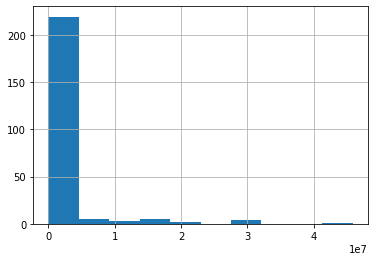

In [7]:
df['Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE]'].hist()

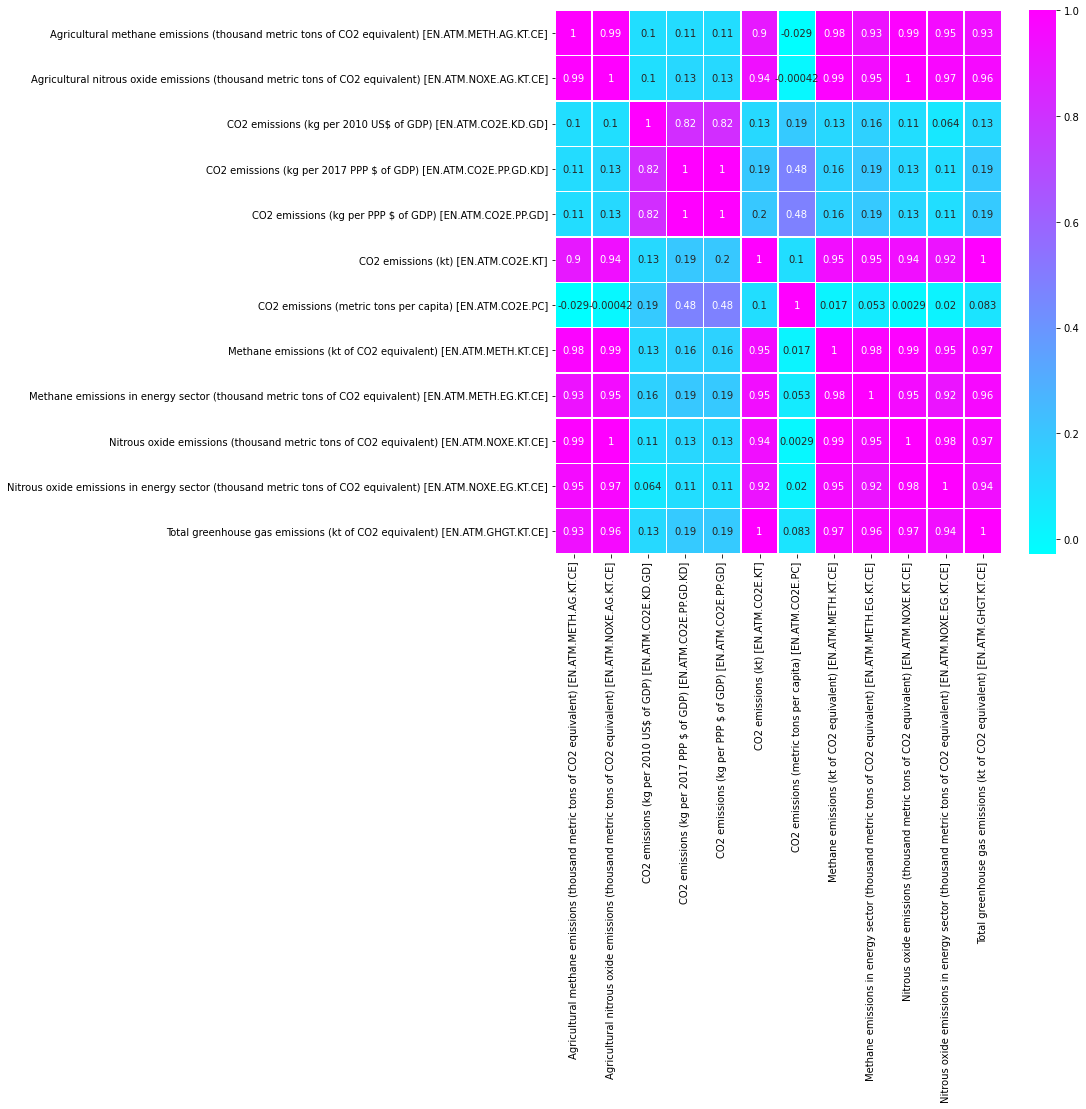

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap=plt.cm.cool, ax=ax)

In [9]:
data = df.fillna(0)
data

,Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE],Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.AG.KT.CE],CO2 emissions (kg per 2010 US$ of GDP) [EN.ATM.CO2E.KD.GD],CO2 emissions (kg per 2017 PPP $ of GDP) [EN.ATM.CO2E.PP.GD.KD],CO2 emissions (kg per PPP $ of GDP) [EN.ATM.CO2E.PP.GD],CO2 emissions (kt) [EN.ATM.CO2E.KT],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],Methane emissions (kt of CO2 equivalent) [EN.ATM.METH.KT.CE],Methane emissions in energy sector (thousand metric tons of CO2 equivalent) [EN.ATM.METH.EG.KT.CE],Nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.KT.CE],Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.EG.KT.CE],Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE]
Country Name,,,,,,,,,,,,
Afghanistan,10450.0,4300.0,0.354490,0.098412,0.096105,7.440000e+03,0.200151,81510.0,67910.0,8960.0,4280.0,98920.0
Albania,2010.0,960.0,0.382224,0.145584,0.143191,5.560000e+03,1.939732,3160.0,220.0,1100.0,90.0,10080.0
Algeria,6810.0,5520.0,0.755336,0.308503,0.301270,1.516700e+05,3.591657,49550.0,28920.0,12110.0,3300.0,218910.0
Andorra,0.0,0.0,0.132353,0.000000,0.000000,4.600000e+02,5.973405,50.0,0.0,0.0,0.0,590.0
Angola,16660.0,15910.0,0.274399,0.127984,0.124984,2.734000e+04,0.887380,35520.0,17460.0,16440.0,180.0,79730.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Sub-Saharan Africa,551980.0,379210.0,0.454161,0.200920,0.197239,8.234247e+05,0.763618,962170.0,298230.0,517600.0,62920.0,2360480.0
Sub-Saharan Africa (excluding high income),551980.0,379210.0,0.454162,0.200898,0.197219,8.228054e+05,0.763113,962080.0,298230.0,517600.0,62920.0,2359700.0
Sub-Saharan Africa (IDA & IBRD countries),551980.0,379210.0,0.454161,0.200920,0.197239,8.234247e+05,0.763618,962170.0,298230.0,517600.0,62920.0,2360480.0


In [10]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(data)
pca.components_

array([[ 5.80566994e-02,  3.78873648e-02,  6.10013963e-09,
         3.84462763e-09,  3.75169350e-09,  5.86499710e-01,
         5.56645372e-08,  1.40958729e-01,  5.78202491e-02,
         4.95417606e-02,  4.35324083e-03,  7.90902128e-01],
       [-3.54325415e-01, -1.74181922e-01, -8.40618949e-09,
         3.95257248e-08,  3.29532727e-08,  5.74806608e-01,
         2.73147429e-06, -6.09133238e-01, -1.78356061e-01,
        -2.11101091e-01, -1.58649166e-02, -2.56986321e-01],
       [-5.09007037e-01, -2.34162137e-01,  4.08687118e-07,
         1.88052106e-07,  1.76852227e-07, -7.61426018e-03,
         3.85850158e-06,  2.41139945e-01,  7.45728403e-01,
        -2.63933075e-01, -3.73922911e-02, -2.65287935e-02],
       [ 3.87330567e-01, -2.73509299e-01,  7.97710914e-07,
         2.28875135e-07,  1.53199197e-07,  2.43441874e-01,
         1.09923471e-06,  4.55901289e-01, -2.03156508e-01,
        -6.21501990e-01, -1.76289836e-01, -2.22356397e-01],
       [ 2.75133581e-01,  2.40943675e-01, -4.5133392

In [11]:
colnames = list(data.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()


,PC1,PC2,Feature
0,5.805670e-02,-3.543254e-01,Agricultural methane emissions (thousand metri...
1,3.788736e-02,-1.741819e-01,Agricultural nitrous oxide emissions (thousand...
2,6.100140e-09,-8.406189e-09,CO2 emissions (kg per 2010 US$ of GDP) [EN.ATM...
3,3.844628e-09,3.952572e-08,CO2 emissions (kg per 2017 PPP $ of GDP) [EN.A...
4,3.751693e-09,3.295327e-08,CO2 emissions (kg per PPP $ of GDP) [EN.ATM.CO...


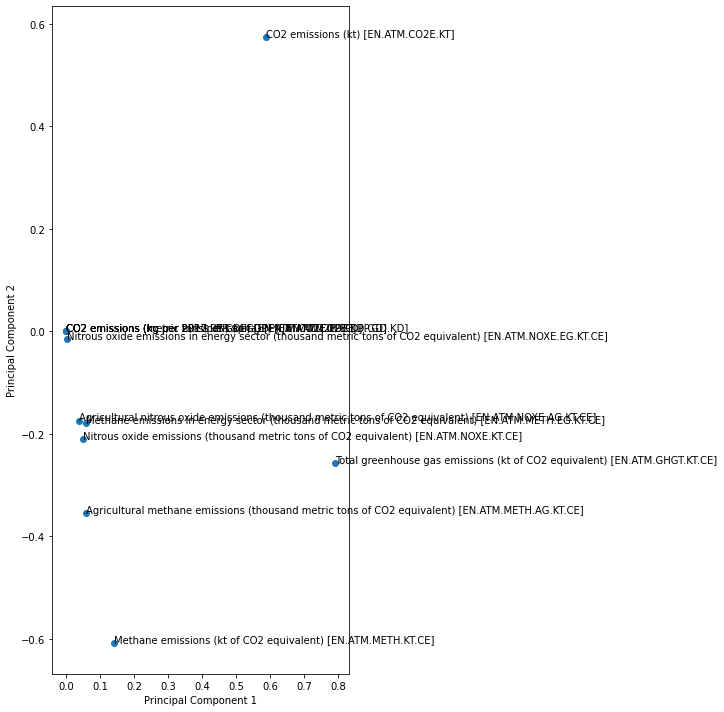

In [12]:
%matplotlib inline
fig = plt.figure(figsize = (10,10))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [13]:
pca.components_[0]

array([5.80566994e-02, 3.78873648e-02, 6.10013963e-09, 3.84462763e-09,
       3.75169350e-09, 5.86499710e-01, 5.56645372e-08, 1.40958729e-01,
       5.78202491e-02, 4.95417606e-02, 4.35324083e-03, 7.90902128e-01])

In [14]:
pca.explained_variance_ratio_

array([9.95805434e-01, 3.88153639e-03, 2.70237352e-04, 2.83291496e-05,
       1.12234746e-05, 2.02884006e-06, 9.04486951e-07, 3.06344822e-07,
       3.47204060e-13, 2.06790576e-15, 1.27968802e-16, 1.59346236e-18])

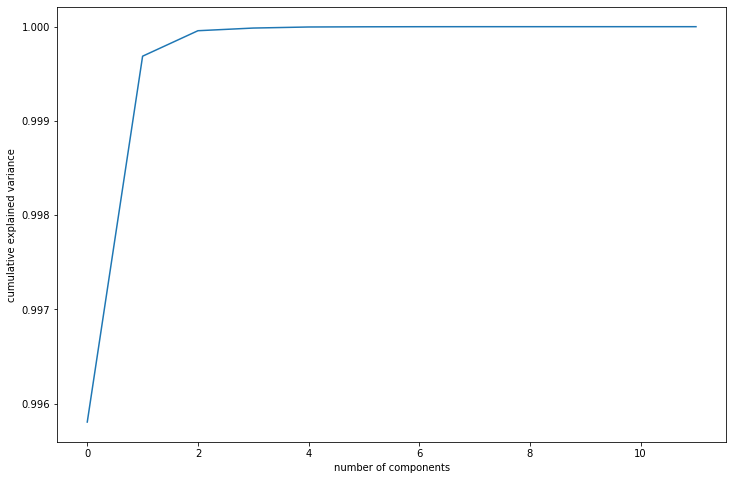

In [15]:
# plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('pca_no')
plt.show()

In [16]:
#Using incremental PCA for efficiency - saves time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=2)

In [17]:
df_pca = pca_final.fit_transform(data)
df_pca.shape

(239, 2)

In [18]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1
0,-2.241074e+06,27460.288113
1,-2.328423e+06,-59437.437598
2,-2.068356e+06,-51492.851521
3,-2.339579e+06,-61990.647108
4,-2.252827e+06,-20234.023906


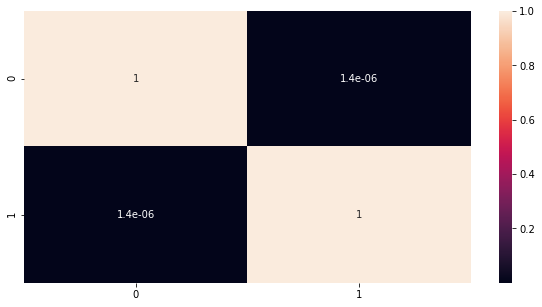

In [19]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(corrmat,annot = True)

**KMeans Clustering**


Finding the right number of clusters

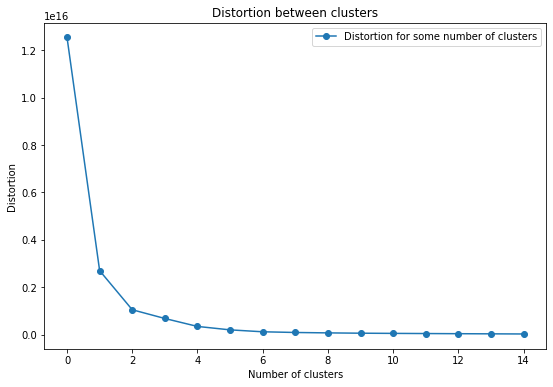

In [20]:
from sklearn.cluster import KMeans
cluster_distorsion = []
for i in range(1, 16):
    test_sklearn = KMeans(n_clusters=i)
    test_sklearn.fit(data)
    cluster_distorsion.append(test_sklearn.inertia_)
plt.figure(figsize=(9, 6))
plt.plot(cluster_distorsion, marker='o', label='Distortion for some number of clusters')
plt.title("Distortion between clusters")
plt.xlabel('Number of clusters')
plt.ylabel("Distortion")
plt.legend()
plt.show()

In [21]:
km = KMeans(n_clusters=4)
clusters = km.fit(data)
clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

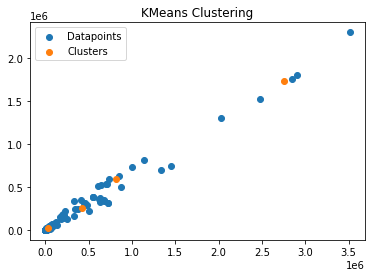

In [22]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], label='Datapoints')
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], label='Clusters')
plt.title("KMeans Clustering")
plt.legend()
plt.show()

In [23]:
data.shape

(239, 12)

In [24]:
clusters.cluster_centers_

array([[2.91682000e+04, 1.82985000e+04, 4.31423371e-01, 2.00586420e-01,
        1.96408588e-01, 9.17227649e+04, 3.97067995e+00, 5.39160000e+04,
        1.64724000e+04, 2.36681000e+04, 2.71640000e+03, 1.73934750e+05],
       [8.15732000e+05, 5.95237000e+05, 6.09039353e-01, 3.30464621e-01,
        3.23166143e-01, 1.22104507e+07, 6.92711878e+00, 2.13604200e+06,
        9.13535000e+05, 8.00335000e+05, 7.61780000e+04, 1.54306850e+07],
       [2.75448600e+06, 1.73371200e+06, 6.55480535e-01, 3.14640418e-01,
        3.07719594e-01, 2.38704916e+07, 3.86604512e+00, 6.49661200e+06,
        2.60602800e+06, 2.24825200e+06, 1.89426000e+05, 3.32173260e+07],
       [4.26735833e+05, 2.57360417e+05, 5.38858747e-01, 2.35352344e-01,
        2.36696539e-01, 2.47466602e+06, 4.63212728e+00, 9.31322500e+05,
        3.49097917e+05, 3.27306667e+05, 3.15291667e+04, 3.80772875e+06]])

In [27]:
data_km = data.copy()
data_km.insert(0, 'KM Cluster Labels', km.labels_)
data_km

,KM Cluster Labels,Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE],Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.AG.KT.CE],CO2 emissions (kg per 2010 US$ of GDP) [EN.ATM.CO2E.KD.GD],CO2 emissions (kg per 2017 PPP $ of GDP) [EN.ATM.CO2E.PP.GD.KD],CO2 emissions (kg per PPP $ of GDP) [EN.ATM.CO2E.PP.GD],CO2 emissions (kt) [EN.ATM.CO2E.KT],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],Methane emissions (kt of CO2 equivalent) [EN.ATM.METH.KT.CE],Methane emissions in energy sector (thousand metric tons of CO2 equivalent) [EN.ATM.METH.EG.KT.CE],Nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.KT.CE],Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.EG.KT.CE],Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE]
Country Name,,,,,,,,,,,,,
Afghanistan,0,10450.0,4300.0,0.354490,0.098412,0.096105,7.440000e+03,0.200151,81510.0,67910.0,8960.0,4280.0,98920.0
Albania,0,2010.0,960.0,0.382224,0.145584,0.143191,5.560000e+03,1.939732,3160.0,220.0,1100.0,90.0,10080.0
Algeria,0,6810.0,5520.0,0.755336,0.308503,0.301270,1.516700e+05,3.591657,49550.0,28920.0,12110.0,3300.0,218910.0
Andorra,0,0.0,0.0,0.132353,0.000000,0.000000,4.600000e+02,5.973405,50.0,0.0,0.0,0.0,590.0
Angola,0,16660.0,15910.0,0.274399,0.127984,0.124984,2.734000e+04,0.887380,35520.0,17460.0,16440.0,180.0,79730.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sub-Saharan Africa,3,551980.0,379210.0,0.454161,0.200920,0.197239,8.234247e+05,0.763618,962170.0,298230.0,517600.0,62920.0,2360480.0
Sub-Saharan Africa (excluding high income),3,551980.0,379210.0,0.454162,0.200898,0.197219,8.228054e+05,0.763113,962080.0,298230.0,517600.0,62920.0,2359700.0
Sub-Saharan Africa (IDA & IBRD countries),3,551980.0,379210.0,0.454161,0.200920,0.197239,8.234247e+05,0.763618,962170.0,298230.0,517600.0,62920.0,2360480.0


In [29]:
data_km.loc[data_km['KM Cluster Labels'] == 0]

,KM Cluster Labels,Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE],Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.AG.KT.CE],CO2 emissions (kg per 2010 US$ of GDP) [EN.ATM.CO2E.KD.GD],CO2 emissions (kg per 2017 PPP $ of GDP) [EN.ATM.CO2E.PP.GD.KD],CO2 emissions (kg per PPP $ of GDP) [EN.ATM.CO2E.PP.GD],CO2 emissions (kt) [EN.ATM.CO2E.KT],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],Methane emissions (kt of CO2 equivalent) [EN.ATM.METH.KT.CE],Methane emissions in energy sector (thousand metric tons of CO2 equivalent) [EN.ATM.METH.EG.KT.CE],Nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.KT.CE],Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.EG.KT.CE],Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE]
Country Name,,,,,,,,,,,,,
Afghanistan,0,10450.0,4300.0,0.354490,0.098412,0.096105,7440.0000,0.200151,81510.0,67910.0,8960.0,4280.0,98920.0
Albania,0,2010.0,960.0,0.382224,0.145584,0.143191,5560.0000,1.939732,3160.0,220.0,1100.0,90.0,10080.0
Algeria,0,6810.0,5520.0,0.755336,0.308503,0.301270,151670.0000,3.591657,49550.0,28920.0,12110.0,3300.0,218910.0
Andorra,0,0.0,0.0,0.132353,0.000000,0.000000,460.0000,5.973405,50.0,0.0,0.0,0.0,590.0
Angola,0,16660.0,15910.0,0.274399,0.127984,0.124984,27340.0000,0.887380,35520.0,17460.0,16440.0,180.0,79730.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Low income,0,374030.0,241330.0,0.286287,0.000000,0.097087,149413.7119,0.236734,644370.0,209450.0,297690.0,45920.0,1108360.0
Other small states,0,13820.0,10480.0,0.467231,0.282391,0.275327,197072.5527,6.406682,73990.0,39690.0,13570.0,2480.0,292880.0
Pacific island small states,0,910.0,390.0,0.445965,0.207741,0.202885,3780.0000,1.539504,2130.0,370.0,530.0,70.0,6720.0


In [30]:
data_km.loc[data_km['KM Cluster Labels'] == 1]

,KM Cluster Labels,Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE],Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.AG.KT.CE],CO2 emissions (kg per 2010 US$ of GDP) [EN.ATM.CO2E.KD.GD],CO2 emissions (kg per 2017 PPP $ of GDP) [EN.ATM.CO2E.PP.GD.KD],CO2 emissions (kg per PPP $ of GDP) [EN.ATM.CO2E.PP.GD],CO2 emissions (kt) [EN.ATM.CO2E.KT],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],Methane emissions (kt of CO2 equivalent) [EN.ATM.METH.KT.CE],Methane emissions in energy sector (thousand metric tons of CO2 equivalent) [EN.ATM.METH.EG.KT.CE],Nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.KT.CE],Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.EG.KT.CE],Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE]
Country Name,,,,,,,,,,,,,
China,1,331360.0,341510.0,0.948528,0.485811,0.474420,1.031346e+07,7.405211,1238630.0,739580.0,538790.0,47460.0,12355240.0
Early-demographic dividend,1,1446930.0,746630.0,0.611477,0.242036,0.241770,7.400360e+06,2.278146,2692600.0,677330.0,891200.0,64860.0,11238210.0
East Asia & Pacific,1,846920.0,629270.0,0.615830,0.372945,0.364975,1.481006e+07,6.361180,2192480.0,937300.0,883270.0,76550.0,17659720.0
East Asia & Pacific (excluding high income),1,707780.0,530700.0,0.877976,0.416751,0.406980,1.190787e+07,5.720397,1961240.0,878100.0,752830.0,60780.0,14973700.0
East Asia & Pacific (IDA & IBRD countries),1,704200.0,529370.0,0.878322,0.416913,0.407137,1.188982e+07,5.782779,1942550.0,864150.0,750420.0,60480.0,14932190.0
High income,1,636990.0,525690.0,0.233906,0.206410,0.201815,1.236637e+07,10.254533,1557710.0,548440.0,691520.0,98720.0,14899650.0
Late-demographic dividend,1,1001930.0,725370.0,0.749598,0.388844,0.378074,1.491280e+07,6.518254,3217690.0,1706310.0,986500.0,82380.0,19448630.0
OECD members,1,739590.0,595320.0,0.227540,0.200517,0.196360,1.199846e+07,8.835264,1656590.0,543120.0,756060.0,97730.0,14851080.0
Post-demographic dividend,1,603130.0,512920.0,0.222937,0.203758,0.199089,1.093546e+07,9.853587,1398670.0,488030.0,667570.0,87840.0,13324230.0


In [31]:
data_km.loc[data_km['KM Cluster Labels'] == 2]

,KM Cluster Labels,Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE],Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.AG.KT.CE],CO2 emissions (kg per 2010 US$ of GDP) [EN.ATM.CO2E.KD.GD],CO2 emissions (kg per 2017 PPP $ of GDP) [EN.ATM.CO2E.PP.GD.KD],CO2 emissions (kg per PPP $ of GDP) [EN.ATM.CO2E.PP.GD],CO2 emissions (kt) [EN.ATM.CO2E.KT],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],Methane emissions (kt of CO2 equivalent) [EN.ATM.METH.KT.CE],Methane emissions in energy sector (thousand metric tons of CO2 equivalent) [EN.ATM.METH.EG.KT.CE],Nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.KT.CE],Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.EG.KT.CE],Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE]
Country Name,,,,,,,,,,,,,
IBRD only,2,2028730.0,1299360.0,0.721344,0.334435,0.328406,20938730.00,4.382903,5191510.0,2191500.0,1671420.0,125390.0,28366540.0
IDA & IBRD total,2,2906080.0,1797760.0,0.701947,0.317964,0.312229,21860535.52,3.409887,6672760.0,2650790.0,2324630.0,194820.0,31474040.0
Low & middle income,2,2849040.0,1758250.0,0.718278,0.323295,0.315229,21334207.73,3.355677,6544370.0,2604810.0,2279280.0,191240.0,30740280.0
Middle income,2,2475010.0,1516920.0,0.725832,0.328014,0.319789,21177938.67,3.698235,5900000.0,2395360.0,1981590.0,145320.0,29631920.0
World,2,3513570.0,2296270.0,0.410001,0.269494,0.262945,34041045.97,4.483524,8174420.0,3187680.0,2984340.0,290360.0,45873850.0


In [32]:
data_km.loc[data_km['KM Cluster Labels'] == 3]

,KM Cluster Labels,Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE],Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.AG.KT.CE],CO2 emissions (kg per 2010 US$ of GDP) [EN.ATM.CO2E.KD.GD],CO2 emissions (kg per 2017 PPP $ of GDP) [EN.ATM.CO2E.PP.GD.KD],CO2 emissions (kg per PPP $ of GDP) [EN.ATM.CO2E.PP.GD],CO2 emissions (kt) [EN.ATM.CO2E.KT],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],Methane emissions (kt of CO2 equivalent) [EN.ATM.METH.KT.CE],Methane emissions in energy sector (thousand metric tons of CO2 equivalent) [EN.ATM.METH.EG.KT.CE],Nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.KT.CE],Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.EG.KT.CE],Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE]
Country Name,,,,,,,,,,,,,
India,3,498490.0,220220.0,0.861293,0.276096,0.269622,2.434520e+06,1.799825,666510.0,99080.0,253790.0,16280.0,3374990.0
Russian Federation,3,51140.0,44850.0,0.921908,0.410720,0.381717,1.607550e+06,11.126618,849570.0,683540.0,58610.0,5050.0,2543400.0
United States,3,202190.0,183060.0,0.277341,0.247474,0.241672,4.981300e+06,15.240875,622590.0,293600.0,250060.0,37530.0,6023620.0
Arab World,3,122480.0,86540.0,0.681962,0.303835,0.296342,1.863604e+06,4.438716,433660.0,163080.0,118310.0,16400.0,2538650.0
Euro area,3,175410.0,126430.0,0.157880,0.139265,0.135835,2.207420e+06,6.454838,283470.0,34740.0,157530.0,20800.0,2716570.0
Europe & Central Asia,3,411580.0,344680.0,0.253848,0.192885,0.187569,6.142069e+06,6.690106,1718880.0,1003400.0,428650.0,43450.0,8425290.0
Europe & Central Asia (excluding high income),3,170840.0,154740.0,0.733180,0.326354,0.314656,2.949087e+06,7.073313,1291550.0,929010.0,193240.0,13580.0,4472930.0
Europe & Central Asia (IDA & IBRD countries),3,186990.0,173530.0,0.694519,0.316628,0.306257,3.278022e+06,7.141751,1342910.0,953100.0,216510.0,16300.0,4885130.0
European Union,3,216400.0,173170.0,0.175664,0.147491,0.143992,2.871000e+06,6.424039,396790.0,77710.0,214110.0,26360.0,3567090.0


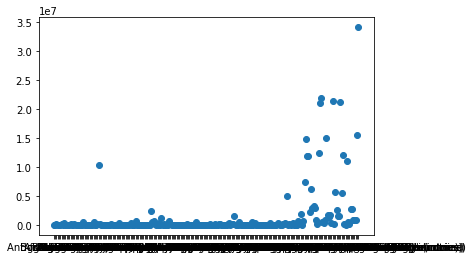

In [46]:
plt.scatter(x=data_km.index, y=data_km['CO2 emissions (kt) [EN.ATM.CO2E.KT]'])

<Figure size 1080x1080 with 0 Axes>

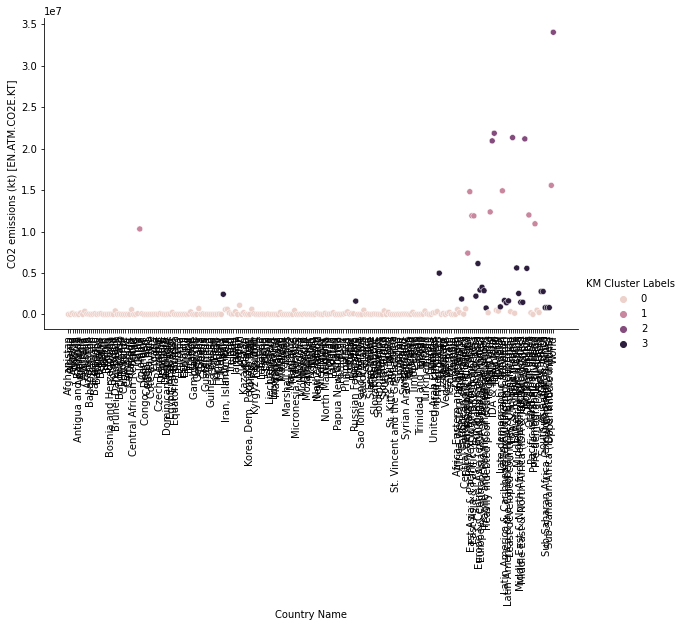

In [51]:
fig = plt.figure(figsize = (15,15))
sns.relplot(data=data_km, x=data_km.index, y='CO2 emissions (kt) [EN.ATM.CO2E.KT]', hue='KM Cluster Labels', aspect=1.61)

plt.xticks(rotation=90)
plt.show()

**Hierarchical Clustering**



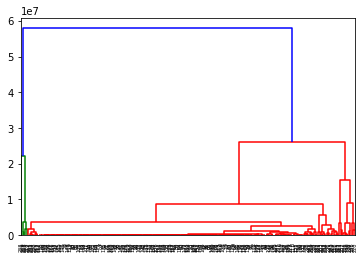

In [53]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

mergings = linkage(df_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [57]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
df_pca_hc = pd.concat([df_pca, clusterCut], axis=1)
df_pca_hc.columns = ["PC1","PC2","ClusterID"]
df_pca_hc.head()

,PC1,PC2,ClusterID
0,-2.241074e+06,27460.288113,0
1,-2.328423e+06,-59437.437598,0
2,-2.068356e+06,-51492.851521,0
3,-2.339579e+06,-61990.647108,0
4,-2.252827e+06,-20234.023906,0


**Mean Shift Clustering**

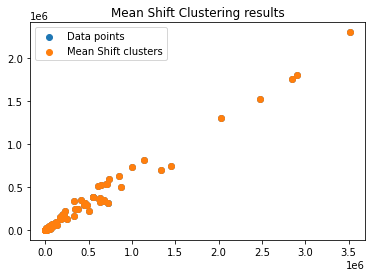

In [61]:
from sklearn.cluster import MeanShift

mean_shift_sklearn = MeanShift(bandwidth=6.5)
clust = mean_shift_sklearn.fit(data)
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], label='Data points')
plt.scatter(clust.cluster_centers_[:, 0], clust.cluster_centers_[:, 1], label='Mean Shift clusters')
plt.title("Mean Shift Clustering results")
plt.legend()
plt.show()